<a href="https://colab.research.google.com/github/hossein20s/kwh_prediction/blob/master/kwh_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition
Check it out from 
https://docs.google.com/document/d/1-ceuHfJ2bNbgmKddLTUCS0HJ1juE5t0042Mts_yEUD8v

# Connecting Colab to GDrive
Connecting colab to GDrive as I kept the data there

In [0]:
!pip install fbprophet
!pip install pystan

In [2]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/data" data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# DATA & SRC Acquisition
Checking out the code from Github

In [14]:
!git clone https://github.com/hossein20s/kwh_prediction
!cd kwh_prediction; git pull
import sys
sys.path.append('kwh_prediction')
import importlib
import power_predictor
importlib.reload(power_predictor)

fatal: destination path 'kwh_prediction' already exists and is not an empty directory.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/hossein20s/kwh_prediction
   1177d41..e40dc24  master     -> origin/master
Updating 1177d41..e40dc24
Fast-forward
 power_predictor.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


<module 'power_predictor' from 'kwh_prediction/power_predictor.py'>

# Data Exploration
some OS level cehcking the data size 

In [0]:
!wc -l data/load_temperature_data.csv

45506 data/load_temperature_data.csv


Conver it to Pandas Dataframe, check its shape a normalize it and add proper column names and index. All dont in __init__ method of class

In [15]:
import pandas as pd
from power_predictor import PowerForecaster, Models, Constants, ColumnNames
from test_power_predictor import TestPowerForecaster

DATA_FILE = 'data/load_temperature_data.csv'
df = pd.read_csv(DATA_FILE)
forecaster = PowerForecaster(df) # check out __init__ method in the imported class

First 3 rows:                                     Unnamed: 0   y  ...  month                  ds
2012-11-01 01:00:00  2012-11-01 01:00:00-07:00 NaN  ...     11 2012-11-01 01:00:00
2012-11-01 01:15:00  2012-11-01 01:15:00-07:00 NaN  ...     11 2012-11-01 01:15:00
2012-11-01 01:30:00  2012-11-01 01:30:00-07:00 NaN  ...     11 2012-11-01 01:30:00

[3 rows x 8 columns]
____________________________________________________________________________________________________
Sample of one element Unnamed: 0            2012-11-01 01:00:00-07:00
y                                           NaN
actual_temperature                     0.458322
date                                 2012-11-01
time                                   01:00:00
dow                                           3
month                                        11
ds                          2012-11-01 01:00:00
Name: 2012-11-01 01:00:00, dtype: object
____________________________________________________________________________________

kwh_prediction/power_predictor.py:94: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Visual Inspection and Sanity Check

Seasional and Hour of day patterns can be seen in the data. We interpolated temperature using Facebook Prophet package

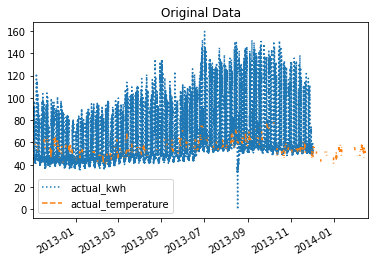

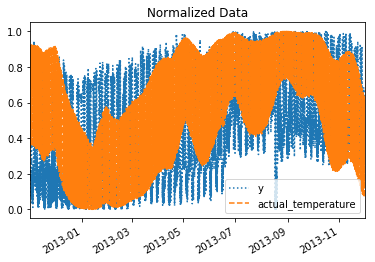

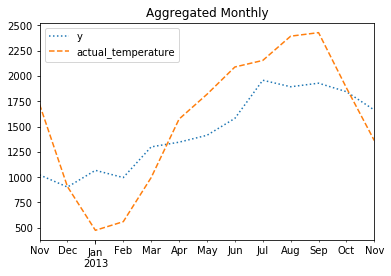

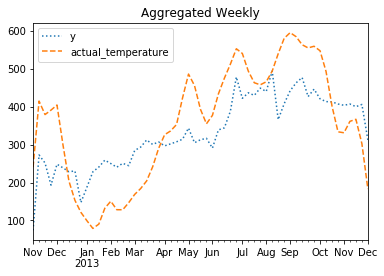

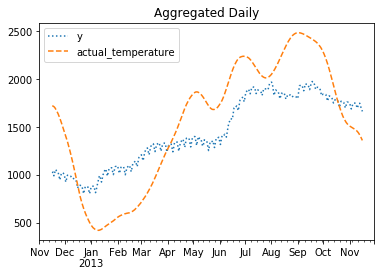

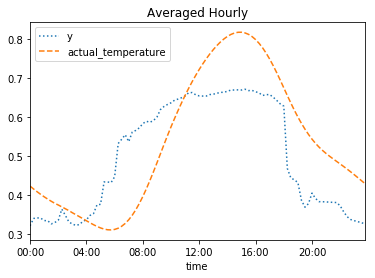

In [16]:
forecaster.visual_inspection()

# Model 1: Facebook Prophet 

In [17]:
forecaster.fit()
print("done fitting, forecasting ...")
predicted = forecaster.predict()

done fitting, forecasting ...


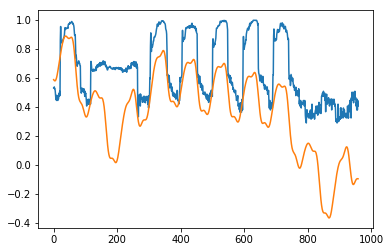

In [18]:
forecaster.plot_prediction(predicted)

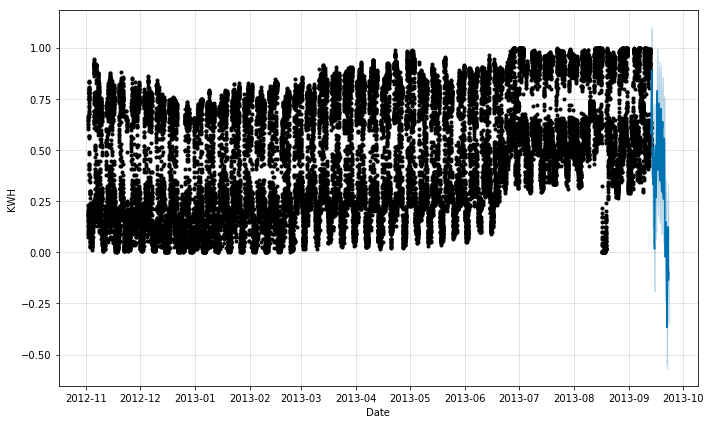

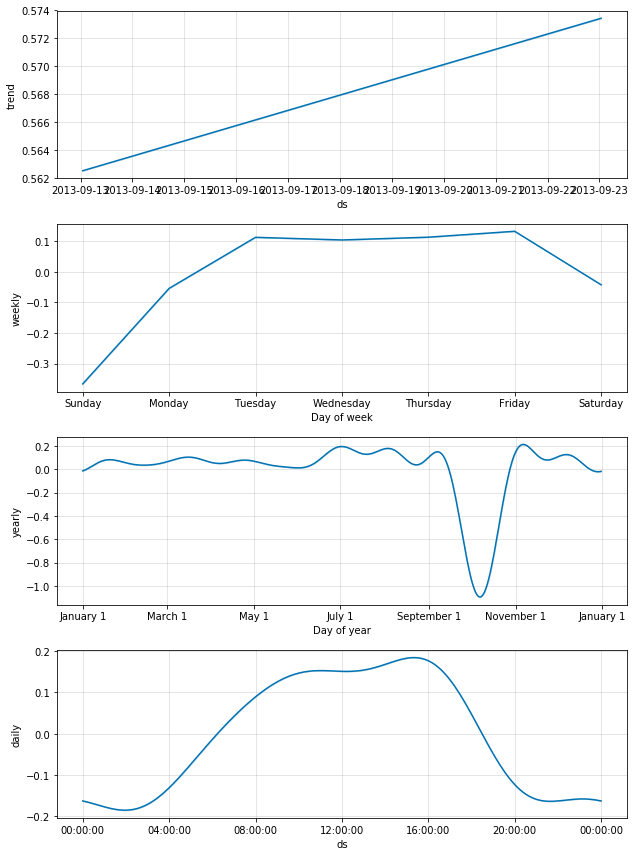

In [19]:
forecaster.plot_future(predicted)

# Model 2: ARIMA

In [20]:
forecaster.model = Models.ARIMA
forecaster.fit()
print("fitted")
predictor = forecaster.predict()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX fitting ....


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



SARIMAX forecast 30336    0.52654
dtype: float64
fitted
2013-09-03 01:00:00 2013-09-13 00:45:00


(960, 23)


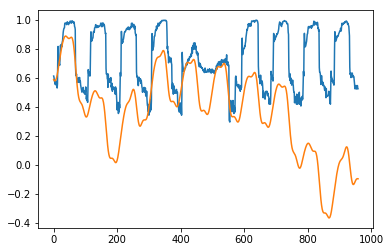

In [21]:
print(predicted.shape)
import matplotlib.pyplot as plt

plt.plot(predicted.index, forecaster.train_y['y'].iloc[-960:], predicted['y'])
plt.show()

# Model 3: VAR (Multivariat)

In [22]:
forecaster.model = Models.VAR
forecaster.fit()
print('fitted')
predicted = forecaster.predict()

making VAR model
VAR fitting ....
fitted


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



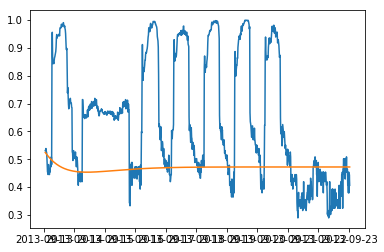

In [23]:
#print(predicted)
forecaster.plot_prediction(predicted)

# Model 4: LSTM

In [0]:
forecaster.model = Models.LSTM
forecaster.fit()

In [0]:
forecaster.stationary_test()


array([0.04886238, 0.00424556])

In [0]:
print(forecaster.history.keys())

import matplotlib.pyplot as plt

plt.plot(forecaster.history['loss'])
plt.plot(forecaster.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


*  Take a look at the first couple of lines 
*  If it has any missing data: *It didn’t*
*  Some statistics on the df: *Sparse data*




**Find out the size of not null data**